In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [200]:
coffee = pd.read_excel('data/베트남 원두 생산량.xlsx')
data = pd.read_excel('data/선_라.xlsx')

In [201]:
coffee.head()
coffee.tail()

,Area,Element,Year,Unit,Value,Note
37,Viet Nam,Yield,2022,kg/ha,2979.00,NaN
38,Viet Nam,Production,2022,t,1953990.16,NaN
39,Viet Nam,Area harvested,2023,ha,666954.00,NaN
40,Viet Nam,Yield,2023,kg/ha,2933.90,NaN
41,Viet Nam,Production,2023,t,1956782.46,NaN


In [202]:
data.head()

,지점명,시간(UTC),월평균 기온,일평균 기온의 월표준편차,월평균 일최고기온,월평균 일최저기온,최대 일강수량,월중 최대풍속,월중 최대풍속 날,월일조시간
0,선 라,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,선 라,2010-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,선 라,2010-03-31,20.6,5.6,27.6,15.6,42.3,15.0,6.0,179.0
3,선 라,2010-04-30,23.6,2.6,30.1,19.0,39.3,14.0,28.0,194.0
4,선 라,2010-05-31,26.3,1.9,32.0,22.6,476.0,NaN,NaN,226.0


In [203]:
# 원하는 컬럼만 선택
UTC_rain = data[['시간(UTC)','최대 일강수량']]
UTC_rain = UTC_rain.set_index('시간(UTC)')
UTC_rain.head()

,최대 일강수량
시간(UTC),
2010-01-31,NaN
2010-02-22,NaN
2010-03-31,42.3
2010-04-30,39.3
2010-05-31,476.0


결측치 <hr>

In [204]:
UTC_rain.isnull().sum()

최대 일강수량    47
dtype: int64

In [205]:
# 결측치를 강수량 월평균값으로 채우기
# 강수량 데이터 타입 변경
data['최대 일강수량'] = data['최대 일강수량'].astype('float')

# 연도, 월 값 컬럼 생성
data['월'] = data['시간(UTC)'].dt.month
data['연도'] = data['시간(UTC)'].dt.year
month_rain = data.groupby('월')['최대 일강수량'].mean()
month_rain = list(map(int, month_rain)) 

for idx in range(len(data)):
    if pd.isnull(data.loc[idx, '최대 일강수량']):
        for month in range(1,13):
            if data.loc[idx, '월'] == month:
                data.loc[idx,'최대 일강수량'] = month_rain[month-1]

In [206]:
# 2016년 데이터 확인
print("2016년 데이터 수:")
print(data[data['연도'] == 2016]['최대 일강수량'].count())

print("\n2016년 결측치 수:")
print(data[data['연도'] == 2016]['최대 일강수량'].isnull().sum())

print("\n2016년 월별 데이터:")
print(data[data['연도'] == 2016].groupby('월')['최대 일강수량'].mean())

2016년 데이터 수:
12

2016년 결측치 수:
0

2016년 월별 데이터:
월
1      40.4
2      26.4
3      26.4
4      24.1
5     150.3
6      75.0
7      33.4
8      75.5
9      56.0
10     15.4
11     32.7
12      1.9
Name: 최대 일강수량, dtype: float64


생산량과 년 평균 강수량 <hr>

In [207]:
UTC_rain = data[['시간(UTC)','최대 일강수량']]

In [208]:
# 데이터 전처리
# 1. 커피 생산량 데이터 처리            # 면적당 수확량 선택
coffee_prod = coffee[coffee['Element'] == 'Yield']
coffee_yearly = coffee_prod.set_index('Year')['Value']

# 2. 최대 일강수량 데이터 처리 - 연도별 평균 계산
UTC_rain = data[['시간(UTC)', '최대 일강수량']].copy()
UTC_rain['연도'] = UTC_rain['시간(UTC)'].dt.year
yearly_rain = UTC_rain.groupby('연도')['최대 일강수량'].mean()

In [209]:
# 평균 확인
yearly_rain
yearly_rain.info()

<class 'pandas.core.series.Series'>
Index: 16 entries, 2010 to 2025
Series name: 최대 일강수량
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [210]:
# # 인덱스 타입 변환
# coffee_yearly.index = coffee_yearly.index.astype(int)
# yearly_rain.index = yearly_rain.index.astype(int)
# yearly_rain.dtype

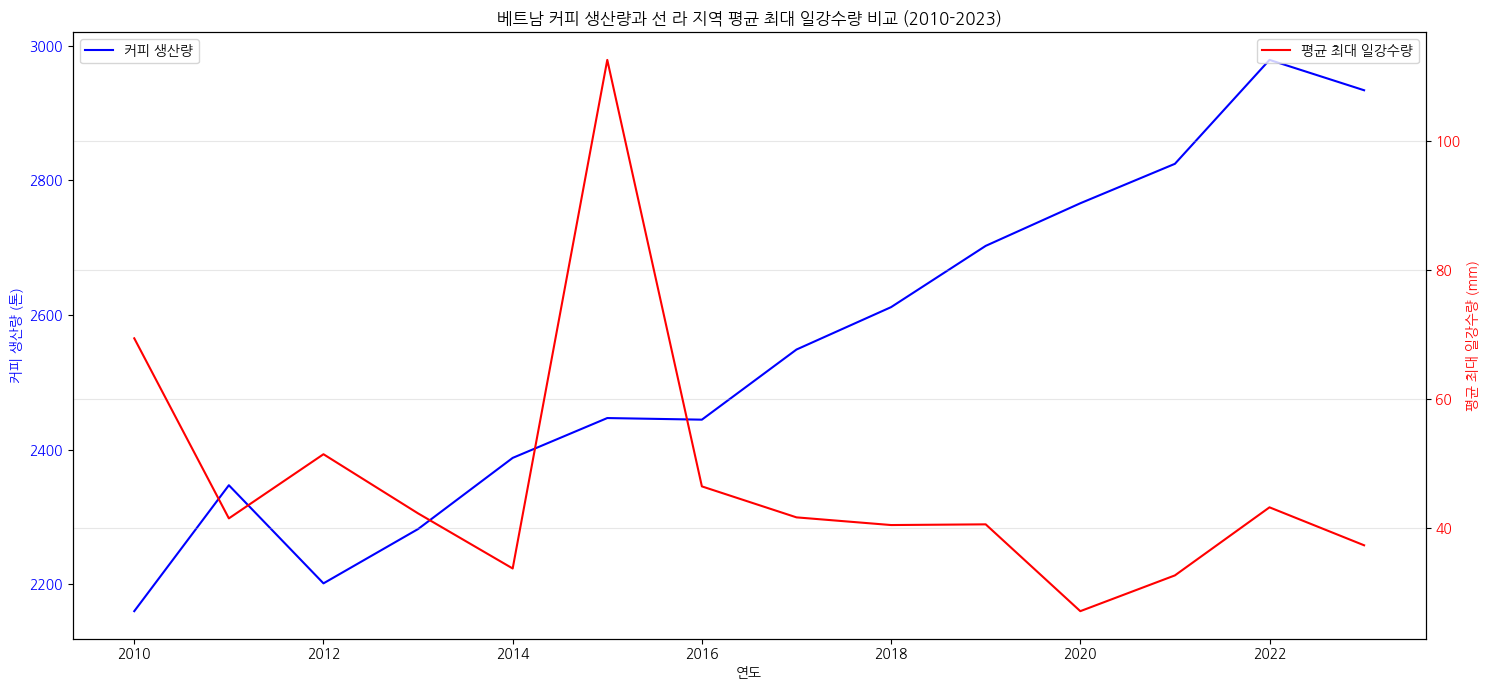

In [211]:
# 2010-2023년 데이터 필터링
coffee_filtered = coffee_yearly.loc[2010:2023]
rain_filtered = yearly_rain.loc[2010:2023]

# 그래프 생성
plt.figure(figsize=(15, 7))

ax1 = plt.gca()  # 현재 Axes 가져오기
ax1.plot(coffee_filtered.index, coffee_filtered.values, 'b-', label='커피 생산량')
ax1.set_xlabel('연도')
ax1.set_ylabel('커피 생산량 (톤)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()  # 두 번째 y축
ax2.plot(rain_filtered.index, rain_filtered.values, 'r-', label='평균 최대 일강수량')
ax2.set_ylabel('평균 최대 일강수량 (mm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 범례 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('베트남 커피 생산량과 선 라 지역 평균 최대 일강수량 비교 (2010-2023)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [212]:
# 커피 생산량과 평균 최대 일강수량의 상관계수 계산
correlation = coffee_filtered.corr(rain_filtered)

# 상관계수 출력
print(f'상관계수: {correlation}')

상관계수: -0.37370830523147347


1. 커피 생산량 (파란색)
2010년~2016년: 커피 생산량은 대체로 일정하거나 약간의 증가세를 보임.
2016년 이후: 커피 생산량이 급격히 증가하며 2023년까지 꾸준히 상승하는 경향이 나타남.
2. 평균 최대 일강수량 (빨간색)
2010년~2016년: 급격히 감소하는 패턴을 보임. 특히 2010년에 매우 높은 값을 기록했다가 2016년까지 큰 폭으로 하락.
2016년 이후: 강수량이 점차 회복되는 경향을 보이지만 2010년 수준에는 미치지 못함.
3. 두 변수 간의 관계
그래프에서 두 변수 간의 패턴은 뚜렷한 상관관계를 보이지 않습니다.
2016년~2023년: 커피 생산량이 상승하는 동안 강수량은 큰 변동 없이 안정된 모습을 보임.
이로 인해 강수량과 커피 생산량 간의 상관계수가 낮거나 약한 음(-)의 값을 보일 가능성이 있음.
4. 잠재적 해석
커피 생산량 증가는 강수량의 직접적인 영향을 받기보다는 농업 기술, 품종 개선, 관개 시설 발전 등의 요인에 더 크게 의존했을 가능성이 있음.
강수량이 극단적으로 높은 시기(2010년)에는 오히려 생산량이 낮았는데, 이는 과도한 강수로 인해 농업 환경이 악화된 결과일 수 있음.

년 생산량과 월 강수량 <hr>

데이터 전처리

In [213]:
# 1. 커피 생산량 데이터 처리
# 'Element' 컬럼에서 'Production' 값만 필터링하여 커피 생산량 데이터만 남기고, 
# 'Year'를 인덱스로 설정하여 'Value' (커피 생산량) 값을 Series로 만듭니다.
coffee_prod = coffee[coffee['Element'] == 'Production'].set_index('Year')['Value']

# 2. 최대 일강수량 데이터 처리
# '시간(UTC)'과 '최대 일강수량' 컬럼만 선택하여, '시간(UTC)'을 인덱스로 설정합니다.
UTC_rain = data[['시간(UTC)', '최대 일강수량']]
UTC_rain = UTC_rain.set_index('시간(UTC)')

In [214]:
# 월별 생산량 데이터 생성
coffee_monthly = pd.DataFrame()  # 빈 데이터프레임 생성
for year in coffee_prod.index:  # 커피 생산량 데이터의 각 연도에 대해 반복
    monthly_data = pd.DataFrame(
        {'Value': [coffee_prod.loc[year]] * 12},  # 해당 연도의 커피 생산량을 12개월에 걸쳐 같은 값으로 할당
        index=pd.date_range(start=f'{year}-01-01', periods=12, freq='ME')  # 한 해의 12개월을 생성, freq='ME'는 각 월의 마지막 날을 인덱스로 생성
    )
    coffee_monthly = pd.concat([coffee_monthly, monthly_data])  # 생성된 월별 데이터를 coffee_monthly 데이터프레임에 이어붙입니다.

In [215]:
# 데이터 필터링 (2010-2023)
# '2010'년부터 '2023'년까지의 데이터를 선택하여 필터링합니다.
coffee_monthly_filtered = coffee_monthly['2010':'2023']
rain_filtered = UTC_rain['2010':'2023']  # 최대 일강수량 데이터도 동일하게 2010-2023 기간으로 필터링
rain_filtered

,최대 일강수량
시간(UTC),
2010-01-31,21.0
2010-02-22,19.0
2010-03-31,42.3
2010-04-30,39.3
2010-05-31,476.0
...,...
2023-08-31,62.2
2023-09-22,56.0
2023-10-31,22.0


그래프 생성

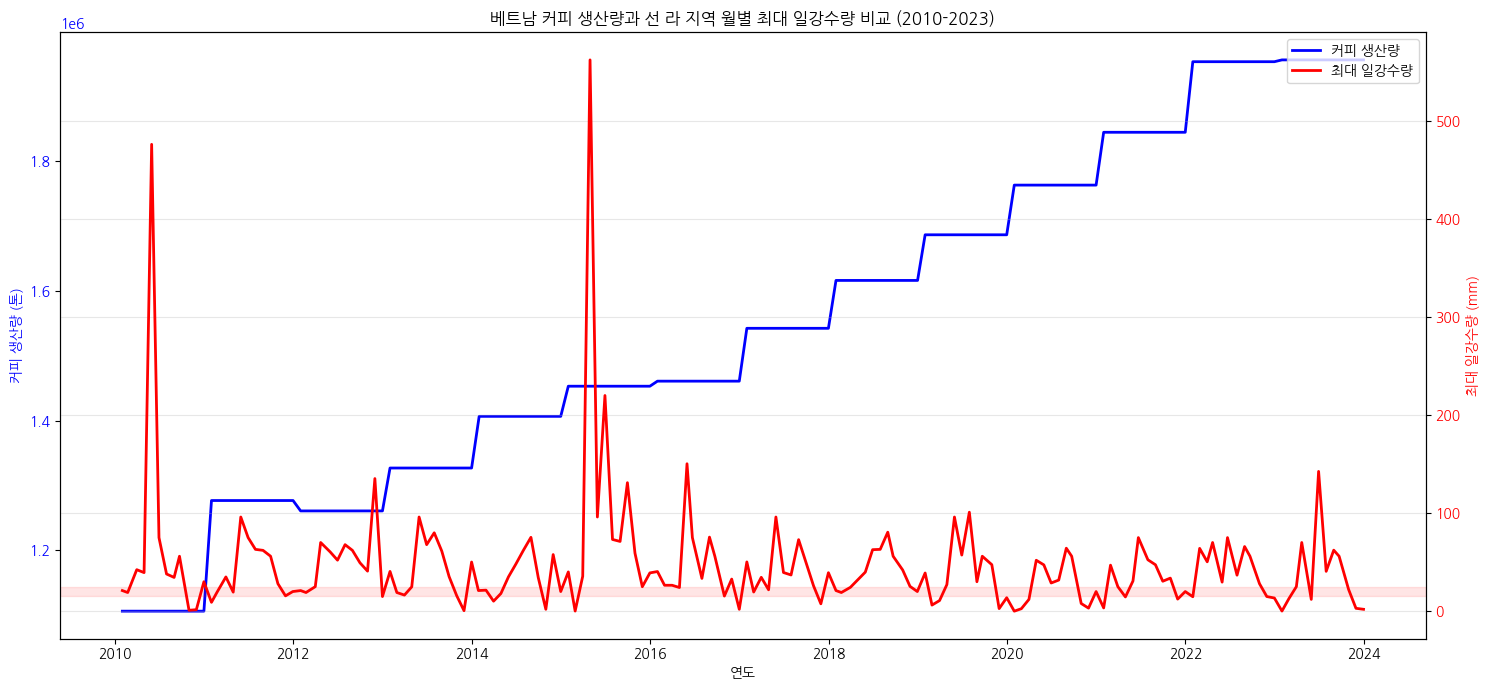

In [216]:
# 그래프 그리기
plt.figure(figsize=(15, 7))  # 그래프 크기 설정

# 커피 생산량 그래프 (왼쪽 y축)
ax1 = plt.gca()  # 현재 Axes 객체를 얻어옵니다.
line1 = ax1.plot(coffee_monthly_filtered.index, coffee_monthly_filtered['Value'], 
                 'b-', label='커피 생산량', linewidth=2)  # 커피 생산량 그래프를 파란색으로 그립니다.
ax1.set_xlabel('연도')  # x축 레이블 설정
ax1.set_ylabel('커피 생산량 (톤)', color='b')  # 왼쪽 y축 레이블 설정 (파란색)
ax1.tick_params(axis='y', labelcolor='b')  # 왼쪽 y축의 tick 색상을 파란색으로 설정

# 두 번째 y축 생성
ax2 = ax1.twinx()  # 오른쪽 y축을 추가하기 위해 twin axes 생성

# 최적 강수량 y축 범위에 색상 표시 (20-25 범위)
ax2.axhspan(15, 25, color='r', alpha=0.1)  # 20-25 범위에 빨간색 배경 추가

# 최대 일강수량 그래프 (오른쪽 y축)
line2 = ax2.plot(rain_filtered.index, rain_filtered['최대 일강수량'], 
                 'r-', label='최대 일강수량', linewidth=2)  # 최대 일강수량 그래프를 빨간색으로 그립니다.
ax2.set_ylabel('최대 일강수량 (mm)', color='r')  # 오른쪽 y축 레이블 설정 (빨간색)
ax2.tick_params(axis='y', labelcolor='r')  # 오른쪽 y축의 tick 색상을 빨간색으로 설정

# x축 설정
plt.xticks(rotation=45)  # x축 레이블을 45도 회전시켜서 가독성을 높입니다.

# 범례 합치기
lines = line1 + line2  # 커피 생산량과 최대 일강수량 그래프의 라인을 합침
labels = [l.get_label() for l in lines]  # 각 라인의 레이블을 추출
ax1.legend(lines, labels, loc='upper right')  # 범례를 그래프의 오른쪽 상단에 위치시킴

# 그래프 제목과 스타일 설정
plt.title('베트남 커피 생산량과 선 라 지역 월별 최대 일강수량 비교 (2010-2023)')  # 제목 설정
plt.grid(True, alpha=0.3)  # 배경 그리드 추가 (불투명도 0.3으로 설정)
plt.tight_layout()  # 레이아웃이 겹치지 않도록 자동으로 조정
plt.show()  # 그래프 출력